In [152]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Import Data

In [153]:
df = pd.read_csv('../large_data/sms-spam/spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [154]:
lbl2idx = {'ham': 0, 'spam':1}
idx2lbl = dict(zip(lbl2idx.values(), lbl2idx.keys()))

X = df.v2.values
y = df.v1.map(lbl2idx).values

In [155]:
# First split into train and test, then fit the vectorizer to train data only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20)

In [156]:
vectorizer = TfidfVectorizer(decode_error='ignore')
x_train = vectorizer.fit_transform(X_train)
x_test = vectorizer.transform(X_test)
print(f"Vocabulary size: {x_train.shape[1]}")

Vocabulary size: 7694


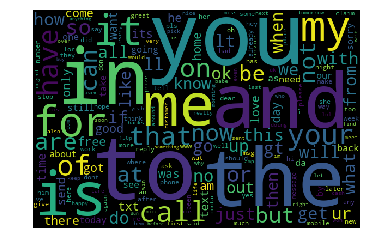

In [148]:
# Word cloud from document frequencies
word_freq = dict(zip(vectorizer.get_feature_names(), 1/vectorizer.idf_))
plt.imshow(WordCloud(width=600, height=400).fit_words(word_freq))
plt.axis('off')
plt.show()

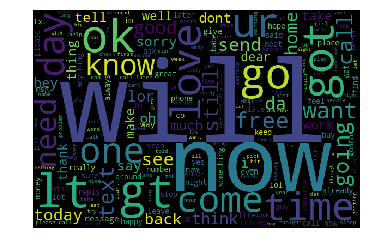

In [118]:
# Word cloud from all messages
words = np.sum(X + ' ').lower()
plt.imshow(WordCloud(width=600, height=400).generate(words))
plt.axis('off')
plt.show()

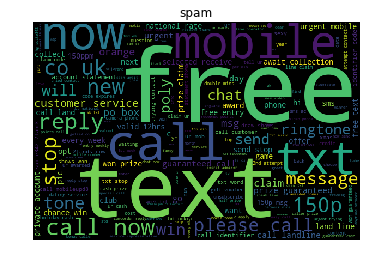

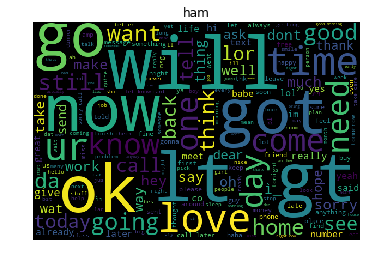

In [119]:
# Visualize word cloud for spam and ham separately
def plot_wordcloud(label):
    idx = lbl2idx[label]
    words = np.sum(X[y == idx] + ' ').lower()
    plt.imshow(WordCloud(width=600, height=400).generate(words))
    plt.title(label)
    plt.axis('off')
    plt.show()

plot_wordcloud('spam')
plot_wordcloud('ham')

# Train an SVC

In [157]:
model = SVC(kernel='linear')  # the standard kernel 'rbf' performs much worse here!

t0 = datetime.now()
model.fit(x_train, y_train)
print(f"Training time: {datetime.now() - t0}")

Training time: 0:00:00.631862


In [140]:
t0 = datetime.now()
score_train = model.score(x_train, y_train)
print(f"Train score: {score_train:.2f} [{datetime.now() - t0}]")

Train score: 1.00 [0:00:00.526920]


In [141]:
t0 = datetime.now()
p_test = model.predict(x_test)
score_test = accuracy_score(y_test, p_test)
print(f"Test score: {score_test:.2f} [{datetime.now() - t0}]")

Test score: 0.99 [0:00:00.138918]


In [130]:
# Misclassified examples
misclassified = np.where(y_test != p_test)[0]
false_positives = misclassified[y_test[misclassified] == lbl2idx['ham']]
false_negatives = misclassified[y_test[misclassified] == lbl2idx['spam']]

print("Ham classified as spam:")
for i in false_positives:
    print(X_test[i])
    if input("Break? (Y/n): ") == "Y": break

print("Spam classified as ham:")
for i in false_negatives:
    print(X_test[i])
    if input("Break? (Y/n): ") == "Y": break

Ham classified as spam:
Glad to see your reply.


Break? (Y/n):  n


Spam classified as ham:
INTERFLORA - åÒIt's not too late to order Interflora flowers for christmas call 0800 505060 to place your order before Midnight tomorrow.


Break? (Y/n):  n


How come it takes so little time for a child who is afraid of the dark to become a teenager who wants to stay out all night?


Break? (Y/n):  n


dating:i have had two of these. Only started after i sent a text to talk sport radio last week. Any connection do you think or coincidence?


Break? (Y/n):  n


Hi ya babe x u 4goten bout me?' scammers getting smart..Though this is a regular vodafone no, if you respond you get further prem rate msg/subscription. Other nos used also. Beware!


Break? (Y/n):  Y
